---

<h1>Thí Nghiệm</h1>

---

| Thông số ảnh hưởng |
|----------|
| Kích Thước Quần Thể|

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from Genetic_Algorithm import * 

In [15]:
items, max_capacity = get_user_input()
get_info()


Thông tin bài toán:

Vật phẩm 1: Weight = 4, Value = 2
Vật phẩm 2: Weight = 2, Value = 4
Vật phẩm 3: Weight = 5, Value = 6
Vật phẩm 4: Weight = 9, Value = 9
Vật phẩm 5: Weight = 10, Value = 7
Vật phẩm 6: Weight = 14, Value = 11
Vật phẩm 7: Weight = 16, Value = 12
Vật phẩm 8: Weight = 18, Value = 4

Maximum capacity = 25


In [16]:
# Thực hiện thử nghiệm với các kích thước quần thể khác nhau
population_sizes = [50, 100, 200, 500]
experiment_results = {}

def run_experiment_with_population(pop_size):
    global POPULATION_SIZE, fitness_history
    
    # Lưu giá trị POPULATION_SIZE ban đầu
    original_pop_size = POPULATION_SIZE
    
    # Thay đổi POPULATION_SIZE cho thử nghiệm
    POPULATION_SIZE = pop_size
    
    # Thực hiện thuật toán di truyền
    best_solution, best_fitness = genetic_algorithm()
    
    # Lưu kết quả
    result = {
        'best_solution': best_solution,
        'best_fitness': best_fitness,
        'fitness_history': fitness_history.copy()  # Lưu lại lịch sử fitness
    }
    
    # Reset fitness_history sau mỗi lần thử nghiệm
    fitness_history.clear()
    
    # Khôi phục giá trị POPULATION_SIZE ban đầu
    POPULATION_SIZE = original_pop_size
    
    return result

# Thực hiện các thử nghiệm cho các kích thước quần thể khác nhau
for pop_size in population_sizes:
    print(f"\nThử nghiệm với kích thước quần thể: {pop_size}")
    
    # Chạy thử nghiệm
    result = run_experiment_with_population(pop_size)
    
    # Lưu kết quả vào experiment_results
    experiment_results[pop_size] = result
    
    print(f"Best Solution: {result['best_solution']}")
    print(f"Best Fitness: {result['best_fitness']}")
    print(f"Fitness History: {result['fitness_history']}")



Thử nghiệm với kích thước quần thể: 50
Best Solution: [0, 1, 0, 1, 0, 1, 0, 0]
Best Fitness: 24
Fitness History: [24, 24, 24, 24, 24, 24, 24, 24, 24, 23, 23, 23, 23, 22, 23, 23, 23, 23, 23, 22, 23, 22, 24, 24, 24, 24, 22, 22, 22, 24, 24, 24, 24, 24, 24, 21, 21, 23, 24, 24, 22, 22, 24, 24, 22, 23, 24, 22, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 22, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 23, 24, 24, 24, 24, 24, 24, 21, 22, 24, 24, 24, 24, 22, 23, 23, 22, 22, 23, 23, 23, 23, 23, 22, 22, 23, 23, 21, 24, 24, 24, 24, 23, 23, 21, 21, 22, 23, 22, 22, 23, 22, 24, 24, 24, 22, 22, 22, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 23, 24, 24, 23, 23, 23, 23, 24, 23, 23, 23, 24, 24, 24, 24, 24, 22, 23, 23, 23]

Thử nghiệm với kích thước quần thể: 100
Best Solution: [0, 1, 0, 1, 0, 1, 0, 0]
Best

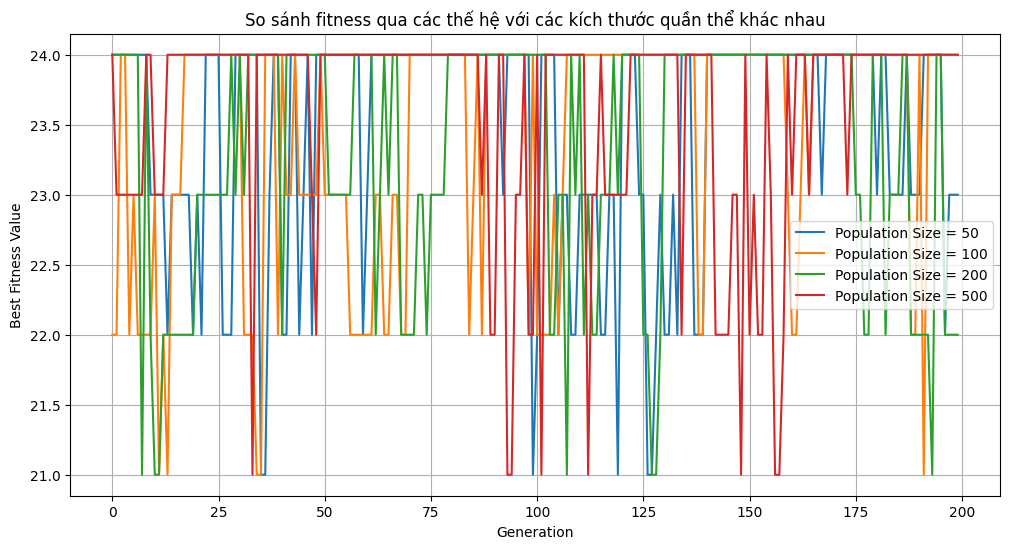

In [17]:
plt.figure(figsize=(12, 6))
for pop_size in population_sizes:
    plt.plot(experiment_results[pop_size]['fitness_history'], 
             label=f'Population Size = {pop_size}')

plt.xlabel('Generation')
plt.ylabel('Best Fitness Value')
plt.title('So sánh fitness qua các thế hệ với các kích thước quần thể khác nhau')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
# Hiển thị bảng kết quả chi tiết
print("\nKết quả chi tiết:")
print("-" * 60)
print(f"{'Population Size':^15} | {'Best Fitness':^15} | {'Convergence Speed':^20}")
print("-" * 60)

for pop_size in population_sizes:
    history = experiment_results[pop_size]['fitness_history']
    final_fitness = history[-1]
    
    # Tính tốc độ hội tụ (số thế hệ để đạt 95% fitness cuối cùng)
    convergence_gen = next(
        (i for i, x in enumerate(history) if x >= 0.95 * final_fitness), 
        len(history)
    )
    
    print(f"{pop_size:^15} | {final_fitness:^15.2f} | {convergence_gen:^20}")

print("-" * 60)


Kết quả chi tiết:
------------------------------------------------------------
Population Size |  Best Fitness   |  Convergence Speed  
------------------------------------------------------------
      50        |      23.00      |          0          
      100       |      24.00      |          2          
      200       |      22.00      |          0          
      500       |      24.00      |          0          
------------------------------------------------------------


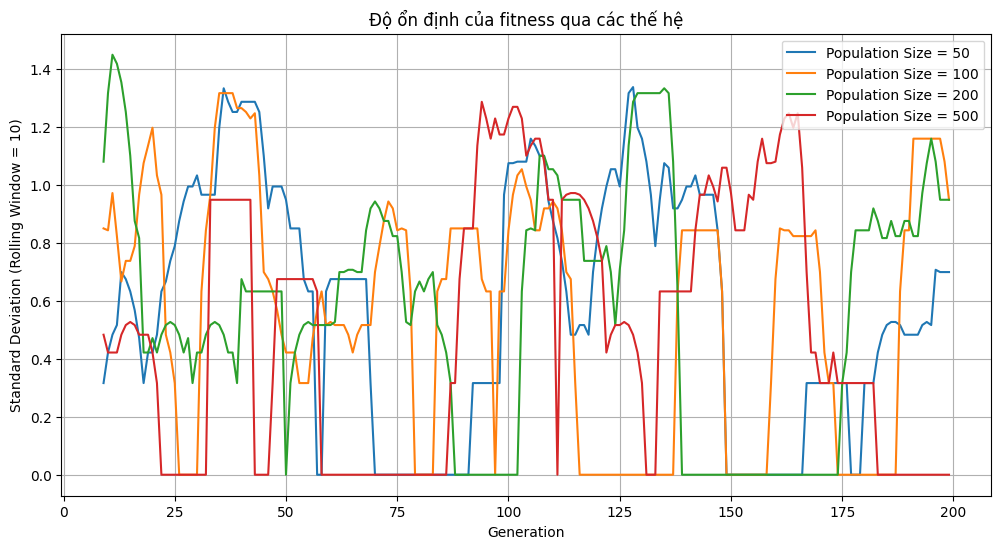

In [19]:
# Phân tích thêm về tính ổn định
plt.figure(figsize=(12, 6))
for pop_size in population_sizes:
    history = experiment_results[pop_size]['fitness_history']
    # Tính độ dao động của fitness
    rolling_std = pd.Series(history).rolling(window=10).std()
    plt.plot(rolling_std, label=f'Population Size = {pop_size}')

plt.xlabel('Generation')
plt.ylabel('Standard Deviation (Rolling Window = 10)')
plt.title('Độ ổn định của fitness qua các thế hệ')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
# Tổng kết và nhận xét
print("\nNhận xét về ảnh hưởng của kích thước quần thể:")
for pop_size in population_sizes:
    history = experiment_results[pop_size]['fitness_history']
    final_fitness = history[-1]
    
    print(f"\nKích thước quần thể {pop_size}:")
    print(f"- Fitness cuối cùng: {final_fitness}")
    print(f"- Tốc độ hội tụ: {next((i for i, x in enumerate(history) if x >= 0.95 * final_fitness), len(history))} thế hệ")
    print(f"- Độ ổn định (std): {np.std(history):.2f}")


Nhận xét về ảnh hưởng của kích thước quần thể:

Kích thước quần thể 50:
- Fitness cuối cùng: 23
- Tốc độ hội tụ: 0 thế hệ
- Độ ổn định (std): 0.82

Kích thước quần thể 100:
- Fitness cuối cùng: 24
- Tốc độ hội tụ: 2 thế hệ
- Độ ổn định (std): 0.87

Kích thước quần thể 200:
- Fitness cuối cùng: 22
- Tốc độ hội tụ: 0 thế hệ
- Độ ổn định (std): 0.89

Kích thước quần thể 500:
- Fitness cuối cùng: 24
- Tốc độ hội tụ: 0 thế hệ
- Độ ổn định (std): 0.79
